# **TimeSeriesAnalysis**

In [ ]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
data=pd.read_csv('/content/dataset_tk.csv')
data

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


In [ ]:
data.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [ ]:
data.shape

(503, 34)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         503 non-null    object 
 1   Punjab             503 non-null    float64
 2   Haryana            503 non-null    float64
 3   Rajasthan          503 non-null    float64
 4   Delhi              503 non-null    float64
 5   UP                 503 non-null    float64
 6   Uttarakhand        503 non-null    float64
 7   HP                 503 non-null    float64
 8   J&K                503 non-null    float64
 9   Chandigarh         503 non-null    float64
 10  Chhattisgarh       503 non-null    float64
 11  Gujarat            503 non-null    float64
 12  MP                 503 non-null    float64
 13  Maharashtra        503 non-null    float64
 14  Goa                503 non-null    float64
 15  DNH                503 non-null    float64
 16  Andhra Pradesh     503 non

In [ ]:
data.tail()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3
502,05/12/2020 00:00:00,120.4,111.2,201.4,83.6,287.3,35.2,24.3,42.6,3.5,...,95.1,110.4,1.2,2.1,20.3,2.5,5.8,1.6,2.1,3.3


In [ ]:
data.columns

Index(['Unnamed: 0', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP',
       'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype='object')

In [ ]:
data.describe()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,83.877137,...,80.464612,138.708151,1.289463,2.109145,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487
std,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,10.130427,...,10.905131,27.849180,0.363565,0.231132,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047
min,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,37.200000,...,51.100000,51.500000,0.300000,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000
25%,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,75.700000,...,71.650000,114.650000,1.100000,2.000000,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000
50%,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,82.600000,...,79.800000,131.200000,1.200000,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000
75%,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,91.600000,...,88.400000,164.750000,1.400000,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000
max,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,111.600000,...,113.000000,198.500000,2.800000,2.700000,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000


In [ ]:
data.isnull().sum()

Unnamed: 0           0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64

In [ ]:
data['Gujarat'].unique()

array([319.5, 316.7, 301.9, 313.2, 320.7, 319.4, 307.9, 260. , 268.3,
       275. , 294.1, 301.2, 305.6, 290.5, 299.5, 282. , 269.1, 260.2,
       273.8, 276.7, 263.5, 391.4, 385.3, 380.2, 380.6, 379.4, 377.9,
       362.8, 203.5, 212. , 217.1, 221.5, 224. , 229.7, 232.2, 215.2,
       229.6, 234.9, 261.5, 282.1, 278.5, 261.9, 317.3, 322.3, 321.8,
       326.9, 322.6, 319.9, 312.3, 385.7, 391.1, 389.9, 394.1, 392.8,
       393. , 376.2, 332.4, 338. , 330.5, 327.8, 330.4, 324. , 316.4,
       313. , 302.4, 305.7, 316.9, 323.9, 300.1, 277.2, 286.2, 291. ,
       294.3, 296.2, 292.6, 295.5, 334.9, 339.2, 336.5, 334.7, 336.7,
       333.5, 318.3, 351.5, 355.6, 357.6, 364.6, 366.5, 366.4, 350.5,
       326.2, 319.2, 314.6, 319.7, 340.6, 330.8, 340.2, 331.8, 328.2,
       356.3, 354.7, 347.2, 344.5, 362. , 361.6, 346.4, 326.4, 329.8,
       325.4, 324.4, 320.9, 317.6, 306.7, 317.2, 320.5, 312.7, 306.6,
       289.4, 279.2, 257.9, 342.2, 355.4, 354.3, 346.8, 338.8, 334.6,
       314.9, 381.2,

In [ ]:
len(data['Gujarat'].unique())

403

In [ ]:
data['Gujarat'].value_counts()

312.7    4
320.9    4
300.2    3
317.1    3
327.4    3
        ..
329.3    1
233.3    1
279.0    1
337.8    1
362.5    1
Name: Gujarat, Length: 403, dtype: int64

In [ ]:
mean_temprature = data.mean().sort_values(ascending=False).reset_index().rename(columns = {"index": "state", 0 : "avg_consumption"})

<ipython-input-21-9ce15fc93a4d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_temprature = data.mean().sort_values(ascending=False).reset_index().rename(columns = {"index": "state", 0 : "avg_consumption"})


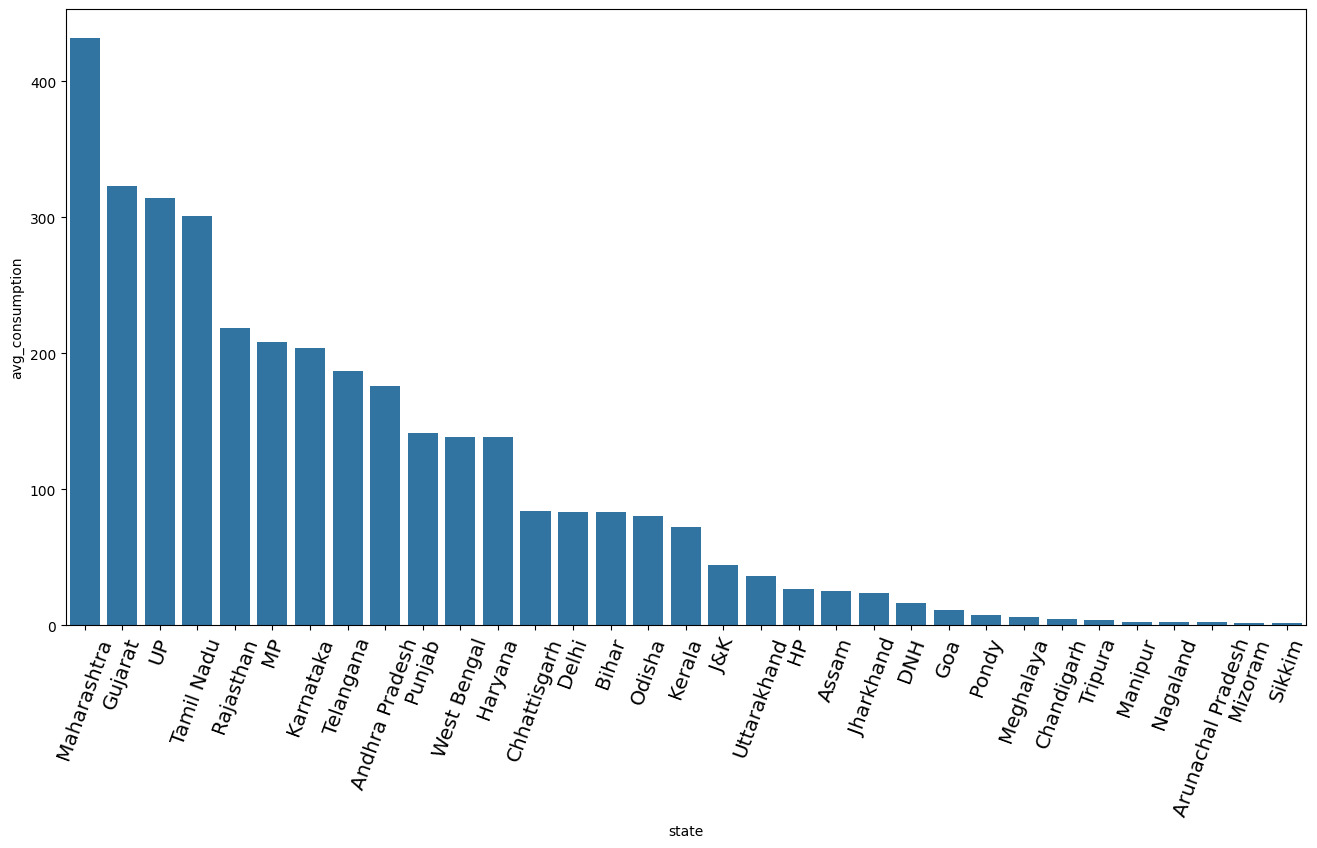

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.barplot(x="state", y="avg_consumption", data=mean_temprature)
plt.xticks(rotation=70, fontweight='light', fontsize='x-large')
plt.show()


(array([  5.,  10.,  10.,  28.,  52.,  88., 160.,  59.,  57.,  34.]),
 array([192.3 , 213.15, 234.  , 254.85, 275.7 , 296.55, 317.4 , 338.25,
        359.1 , 379.95, 400.8 ]),
 <BarContainer object of 10 artists>)

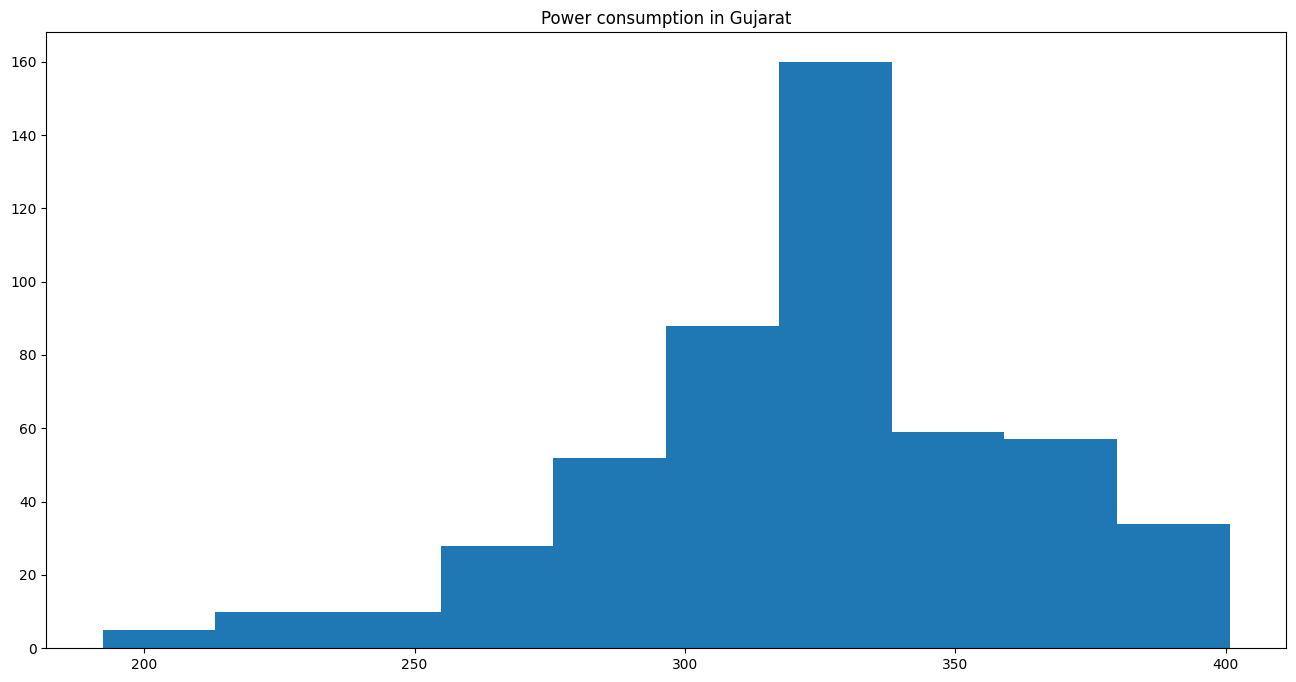

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Power consumption in Gujarat')
plt.hist(data.Gujarat)

In [ ]:
power = data.drop( data.index[137:467] )
power

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


In [ ]:
df=pd.read_csv("/content/long_data_.csv")

In [ ]:
df.describe()

,latitude,longitude,Usage
count,16599.000000,16599.000000,16599.000000
mean,23.178220,81.794533,103.001862
std,6.146575,7.258429,116.044056
min,8.900373,71.192400,0.300000
25%,19.820430,76.569993,6.700000
50%,23.835404,78.570026,64.400000
75%,27.333330,88.329947,173.900000
max,33.450000,94.216667,522.100000


from matplotlib import pyplot as plt
_df_53['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55['Usage'].plot(kind='hist', bins=20, title='Usage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56.plot(kind='scatter', x='latitude', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57.plot(kind='scatter', x='longitude', y='Usage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_59['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_60['Usage'].plot(kind='line', figsize=(8, 4), title='Usage')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB


In [ ]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


from matplotlib import pyplot as plt
_df_37['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Usage'].plot(kind='hist', bins=20, title='Usage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_40.groupby('States').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x='latitude', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='longitude', y='Usage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('Dates', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('States')):
  _plot_series(series, series_name, i)
  fig.legend(title='States', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_44.sort_values('Dates', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('States')):
  _plot_series(series, series_name, i)
  fig.legend(title='States', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('longitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['Usage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_45.sort_values('Dates', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('States')):
  _plot_series(series, series_name, i)
  fig.legend(title='States', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('Usage')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Dates']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Dates'}, axis=1)
              .sort_values('Dates', ascending=True))
  xs = counted['Dates']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_46.sort_values('Dates', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('States')):
  _plot_series(series, series_name, i)
  fig.legend(title='States', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_47['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_48['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_49['Usage'].plot(kind='line', figsize=(8, 4), title='Usage')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_50['States'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_50, x='latitude', y='States', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_51['States'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_51, x='longitude', y='States', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['States'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='Usage', y='States', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
fig = px.scatter_geo(df,'latitude','longitude', color="Regions",
                     hover_name="States", size="Usage",
                      scope='asia',
                     projection="natural earth")
fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100])
fig.show()

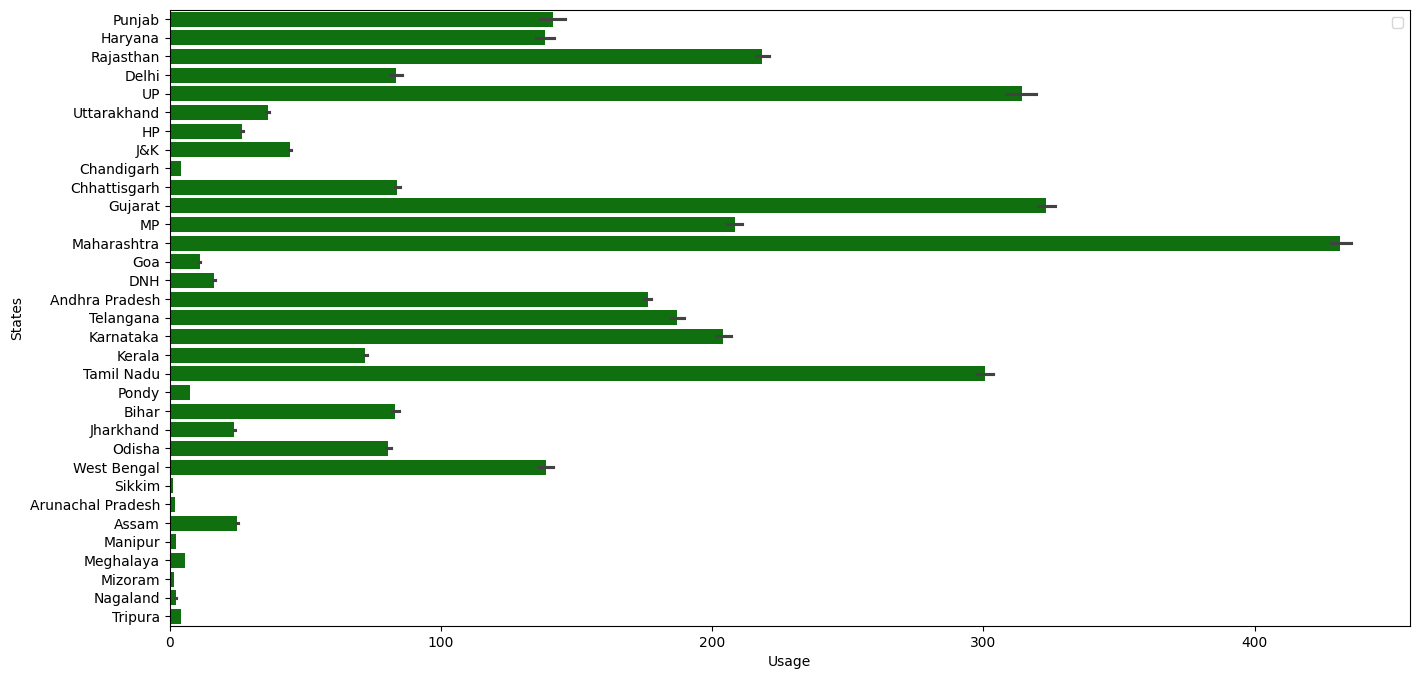

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot( x=df["Usage"], y=df["States"], color="green")
plt.legend()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'MP'),
  Text(1, 0, 'Uttarakhand'),
  Text(2, 0, 'Pondy'),
  Text(3, 0, 'DNH'),
  Text(4, 0, 'Andhra Pradesh'),
  Text(5, 0, 'West Bengal'),
  Text(6, 0, 'Manipur'),
  Text(7, 0, 'J&K'),
  Text(8, 0, 'Tripura'),
  Text(9, 0, 'Sikkim'),
  Text(10, 0, 'Odisha'),
  Text(11, 0, 'HP'),
  Text(12, 0, 'Punjab'),
  Text(13, 0, 'Assam'),
  Text(14, 0, 'Nagaland')])

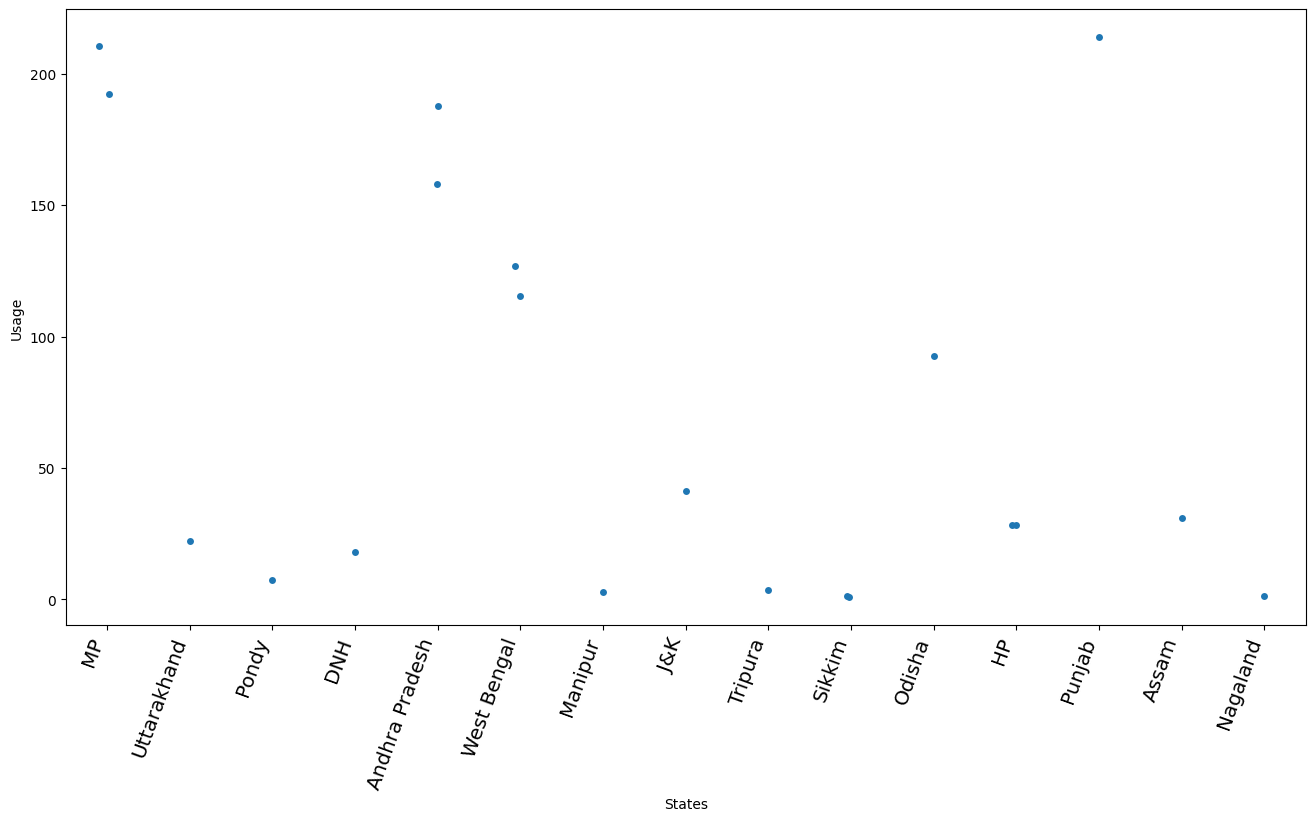

In [ ]:
plt.figure(figsize=(16,8))
sns.stripplot(x="States", y="Usage", data=df.sample(n=20))
plt.xticks(rotation=70, horizontalalignment='right', fontweight='light', fontsize='x-large')

([0], [Text(0, 0, '')])

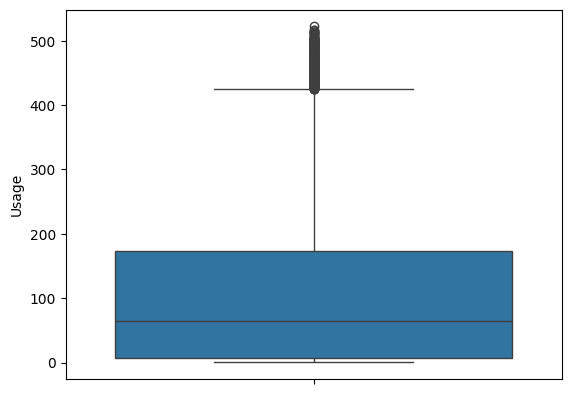

In [ ]:
sns.boxplot(y="Usage", data=df)
plt.xticks(rotation=70, horizontalalignment='right', fontweight='light', fontsize='x-large')

<Figure size 2000x1000 with 0 Axes>

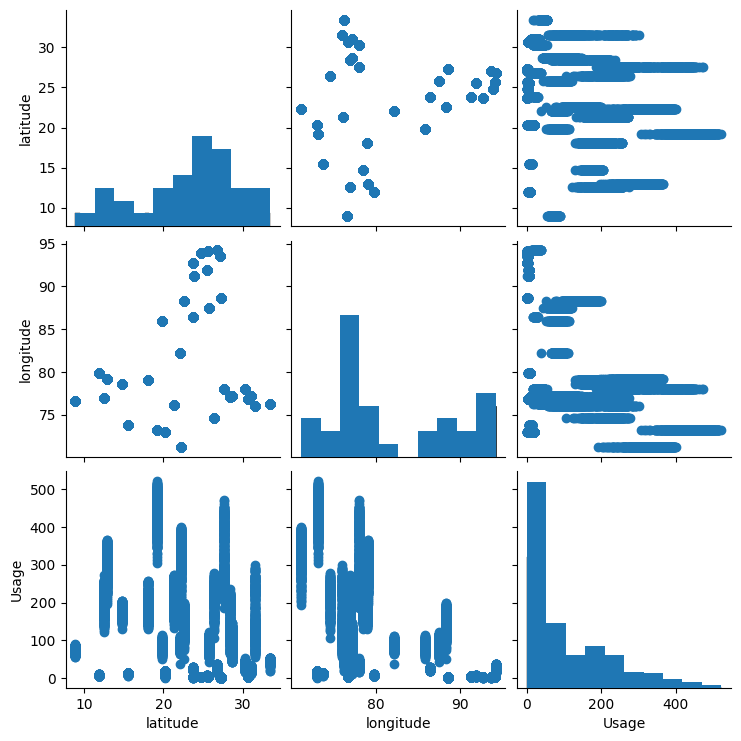

In [ ]:
plt.figure(figsize=(20,10))
chart = sns.pairplot(df)
chart.map_diag(plt.hist)
chart.map_offdiag(plt.scatter)

In [ ]:
pie_df = df.sample(n=5)
pie_df.head()

,States,Regions,latitude,longitude,Dates,Usage
9318,Maharashtra,WR,19.250232,73.160175,14/10/2019 00:00:00,495.2
4359,Delhi,NR,28.669993,77.230004,18/05/2019 00:00:00,98.9
12691,Tamil Nadu,SR,12.920386,79.150042,02/02/2020 00:00:00,268.8
3492,Assam,NER,26.749981,94.216667,20/04/2019 00:00:00,20.7
916,Sikkim,ER,27.333330,88.616647,29/01/2019 00:00:00,1.0


from matplotlib import pyplot as plt
_df_16['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Usage'].plot(kind='hist', bins=20, title='Usage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('States').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('Regions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('Dates').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='latitude', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='longitude', y='Usage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Dates', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('States')):
  _plot_series(series, series_name, i)
  fig.legend(title='States', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Dates', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Regions')):
  _plot_series(series, series_name, i)
  fig.legend(title='Regions', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Dates', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Dates')):
  _plot_series(series, series_name, i)
  fig.legend(title='Dates', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Dates', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('States')):
  _plot_series(series, series_name, i)
  fig.legend(title='States', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('longitude')

from matplotlib import pyplot as plt
_df_28['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Usage'].plot(kind='line', figsize=(8, 4), title='Usage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Regions'].value_counts()
    for x_label, grp in _df_31.groupby('States')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('States')
_ = plt.ylabel('Regions')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Dates'].value_counts()
    for x_label, grp in _df_32.groupby('Regions')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Regions')
_ = plt.ylabel('Dates')

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['States'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='latitude', y='States', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['Regions'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='latitude', y='Regions', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['Dates'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='latitude', y='Dates', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['States'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='longitude', y='States', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

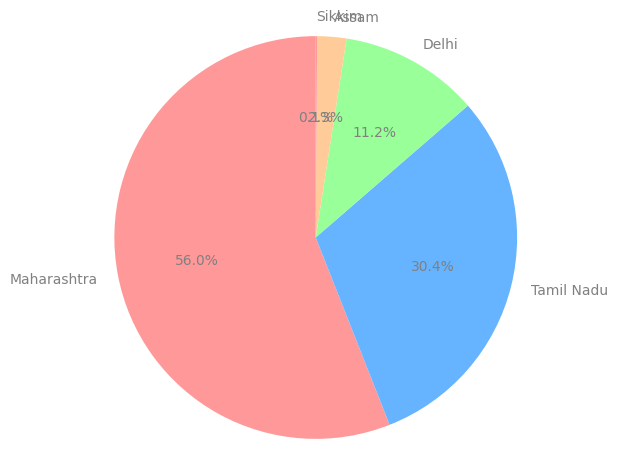

In [ ]:
pie_df.sort_values('Usage', inplace=True, ascending=False)
labels = pie_df["States"]
sizes = pie_df['Usage']/pie_df['Usage'].sum()
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('grey')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

<ipython-input-53-bffbde57fb1a>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




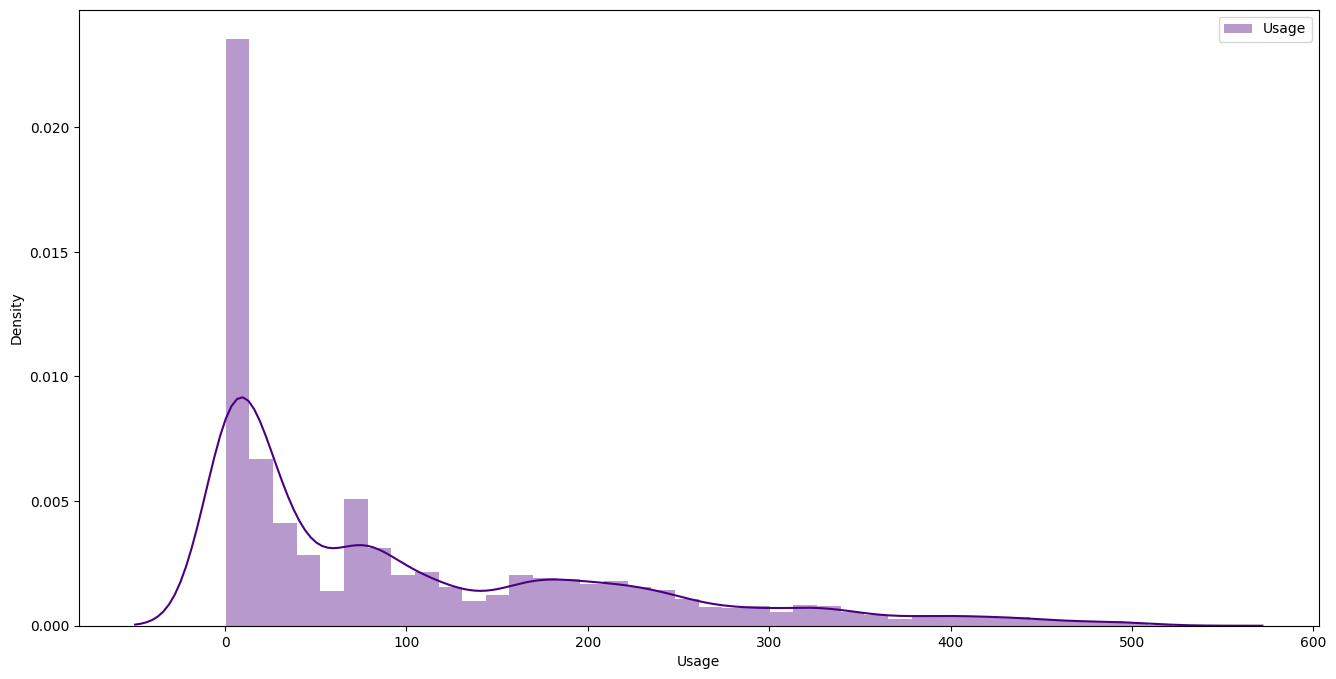

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot( df["Usage"] , color="indigo", label="Usage")
plt.legend()

<ipython-input-54-ba07b7276e11>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-54-ba07b7276e11>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




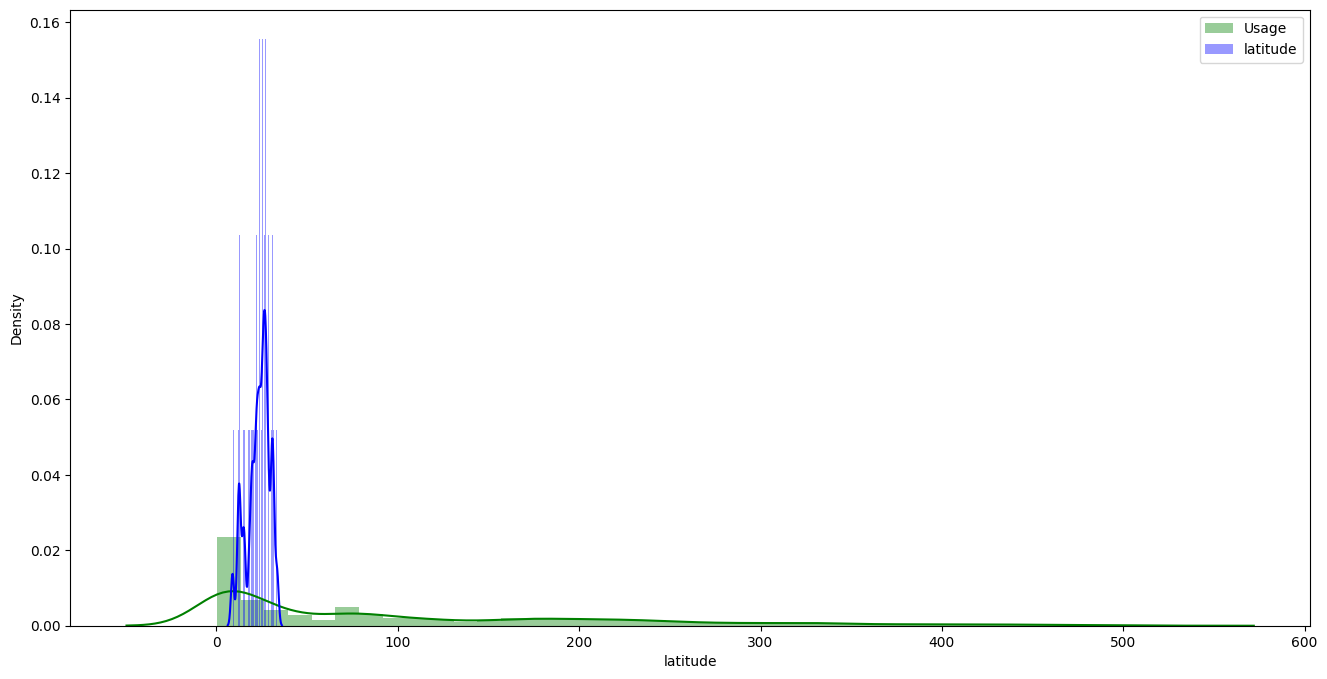

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot( df["Usage"] , color="green", label="Usage")
sns.distplot( df["latitude"] , color="blue", label="latitude")
plt.legend()

<Axes: ylabel='Usage'>

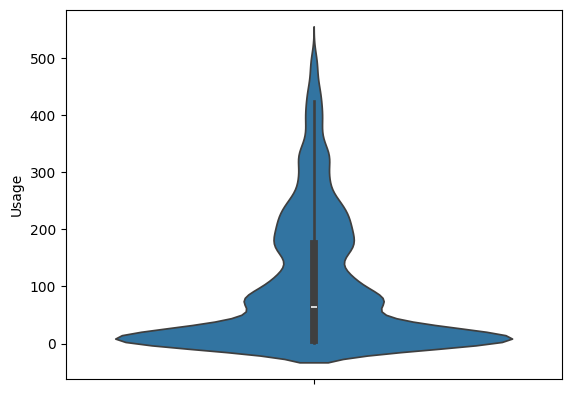

In [ ]:
sns.violinplot(df['Usage'])

<Figure size 1600x800 with 0 Axes>

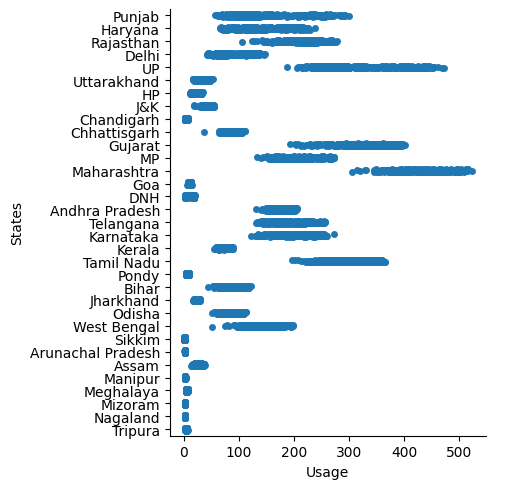

In [ ]:
plt.figure(figsize=(16,8))
sns.catplot(x="Usage",y="States",data=df)

In [ ]:
df['Dates']=pd.to_datetime(df["Dates"],dayfirst=True)
df["year"]=df["Dates"].dt.year

In [ ]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage,year
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2019
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,2019
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2019
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,2019
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,2019


from matplotlib import pyplot as plt
_df_0['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Usage'].plot(kind='hist', bins=20, title='Usage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('States').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='latitude', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='longitude', y='Usage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Dates', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('States')):
  _plot_series(series, series_name, i)
  fig.legend(title='States', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Dates', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('States')):
  _plot_series(series, series_name, i)
  fig.legend(title='States', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('longitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['Usage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Dates', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('States')):
  _plot_series(series, series_name, i)
  fig.legend(title='States', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('Usage')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Dates']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Dates'}, axis=1)
              .sort_values('Dates', ascending=True))
  xs = counted['Dates']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Dates', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('States')):
  _plot_series(series, series_name, i)
  fig.legend(title='States', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Usage'].plot(kind='line', figsize=(8, 4), title='Usage')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['States'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='latitude', y='States', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['States'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='longitude', y='States', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['States'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Usage', y='States', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
year1 = df.groupby(df['year']).sum()


<ipython-input-60-78110339991b>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
year1

,latitude,longitude,Usage
year,,,
2019,274592.375123,969019.837919,1216205.3
2020,110142.902556,388687.623009,493522.6


from matplotlib import pyplot as plt
year1['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
year1['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
year1['Usage'].plot(kind='hist', bins=20, title='Usage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
year1.plot(kind='scatter', x='latitude', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
year1.plot(kind='scatter', x='longitude', y='Usage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
year1['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
year1['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
year1['Usage'].plot(kind='line', figsize=(8, 4), title='Usage')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: title={'center': 'Power consumption of states yearly'}, ylabel='year'>

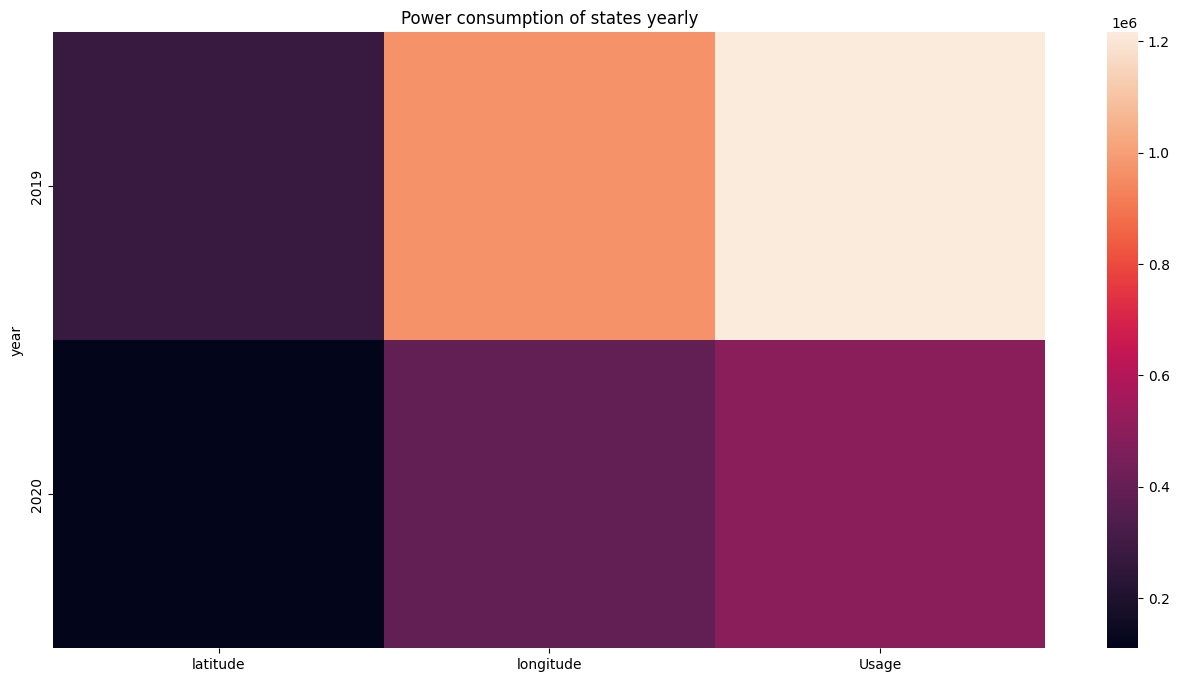

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Power consumption of states yearly')
sns.heatmap(year1)